# Início

Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Ler o csv direto do github

In [2]:
url = 'https://raw.githubusercontent.com/sofiamalpique/gecad-tese-public/main/df_after_cleaning.csv'
df = pd.read_csv(url)

In [3]:
df

,DataDiagnostico,Evolucao,Sexo,RacaCor,Gestante,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,...,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado,ProfissionalSaude,PossuiDeficiencia,DataFinal,NumDias,Idade
0,2021-06-27,Cura,M,Parda,0.0,Não,Não,Não,Não,Não,...,Não,Não,Não,Não,Não,Não,Não,2021-07-09,12,24
1,2021-06-29,Cura,M,Parda,0.0,Não,Não,Não,Não,Sim,...,Não,Não,Não,Não,Não,Não,Não,2021-07-09,10,26
2,2021-06-16,Cura,M,Branca,0.0,Sim,Não,Sim,Sim,Sim,...,Não,Não,Não,Não,Não,Não,Não,2021-06-26,10,32
3,2021-06-21,Cura,F,Parda,0.0,Não,Não,Sim,Não,Não,...,Não,Não,Não,Não,Não,Não,Não,2021-06-30,9,22
4,2021-07-05,Cura,F,Parda,0.0,Não,Não,Sim,Sim,Sim,...,Não,Não,Não,Não,Não,Não,Não,2021-07-09,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189620,2020-03-17,Cura,M,Branca,0.0,Sim,Não,Sim,Não,Não,...,Não,Não,Não,Não,Não,Não,Não,2020-04-15,29,54
189621,2020-03-13,Cura,M,Parda,0.0,Sim,Sim,Sim,Não,Sim,...,Não,Não,Não,Não,Não,Não,Não,2020-04-15,33,28
189622,2020-03-15,Cura,M,Branca,0.0,Sim,Sim,Sim,Não,Não,...,Não,Não,Não,Não,Não,Não,Não,2020-04-14,30,41
189623,2020-03-14,Cura,F,Parda,0.0,Não,Não,Não,Sim,Não,...,Não,Não,Não,Não,Não,Não,Não,2020-04-15,32,57


# Análise Exploratória de Dados

Vamos agora analisar cada uma das features do nosso dataset, vamos ver a distribuição das classes para cada feature, no caso de variáveis categóricas, e vamos ver a distribuição dos valores das variáveis numéricas do dataset.

Para não alterar em demasia o dataset de trabalho, vamos criar diferentes versões do dataset para auxiliar a análise das features em questão.

## Datas Relevantes


Vamos agora criar um sub-dataset que contém apenas Data de Diagnóstico, Data Final e duração da doença.

In [4]:
df_datas = df[['DataDiagnostico', 'DataFinal', 'NumDias','FicouInternado']].copy()

Com este sub-dataset, vamos analisar a duração da doença (e os respetivos outliers), e faremos uma análise em paralelo - com e sem outliers - em tudo o que fizermos com as outras features.

Datas por si só transmitem pouca informação, então vamos agrupar as datas em meses do ano e em estações do ano para vermos quais os meses e estações do ano com maior incidência de COVID-19.

### Duração da Doença

Como já tratamos dos valores negativos e dos valores que eram demasiado grandes para o período considerado, vamos agora prosseguir para a visualização da distribuição dos valores da duração da COVID.

Como já foi referido anteriormente, temos vários outliers que alteram e dificultam a visualização destes dados.

Os gráficos caixa-de-bigodes (box plots) são normalmente usados para identificar valores atípicos (chamados outliers) num dataset. Num gráfico caixa-de-bigodes, os outliers são representados como pontos individuais que estão fora dos limites (bigodes) do gráfico.

Para tal iremos:


1. Criar um gráfico caixa-de-bigodes com a função ```plt.boxplot()``` do Matplotlib, passando o dataset ```df_datas``` como parâmetro.

2. Observar os limites (bigodes) do gráfico caixa-de-bigodes, dado que representam o intervalo dos dados dentro de uma certa distância da mediana.

3. Identificar os pontos fora dos limites. Esses pontos, conhecidos como fliers, são potenciais outliers.

In [5]:
df_datas.NumDias.describe()

count    189625.000000
mean         20.227918
std          19.542650
min           0.000000
25%          11.000000
50%          15.000000
75%          21.000000
max         448.000000
Name: NumDias, dtype: float64

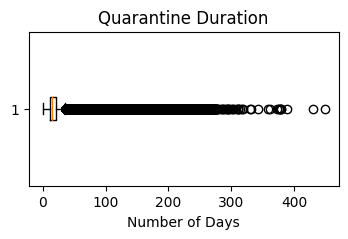

In [6]:
# Criar caixa de bigodes horizontal
fig, ax = plt.subplots(figsize=(4,2))
ax.boxplot(df_datas['NumDias'], vert=False)

# Set plot properties
ax.set_title('Quarantine Duration')
ax.set_xlabel('Number of Days')
#ax.set_yticklabels(['Dados'])
plt.show()

Vamos descobrir os limites, iterativamente.

In [7]:
df_datas_sem_outliers = df_datas.copy()

df_datas_sem_outliers = df_datas_sem_outliers[(df_datas_sem_outliers['NumDias'] < 27) &(df_datas_sem_outliers['NumDias'] > 1)]

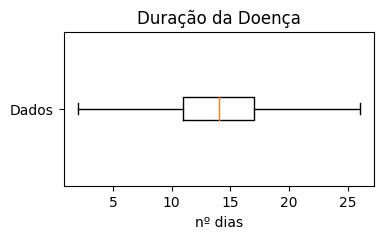

In [8]:
# Criar caixa de bigodes horizontal
fig, ax = plt.subplots(figsize=(4,2))
ax.boxplot(df_datas_sem_outliers['NumDias'], vert=False)

# Set plot properties
ax.set_title('Duração da Doença')
ax.set_xlabel('nº dias')
ax.set_yticklabels(['Dados'])
plt.show()

Vamos agora ver a distribuição dos valores da duração da COVID-19 nos dados sem outlier através de um histograma.


In [9]:
df_datas_hosp = df_datas.copy()
mask = (df_datas_hosp['FicouInternado'] == 'Sim')
df_datas_hosp = df_datas_hosp.loc[mask]

df_datas_non_hosp = df_datas.copy()
mask = (df_datas_non_hosp['FicouInternado'] == 'Não')
df_datas_non_hosp = df_datas_non_hosp.loc[mask]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


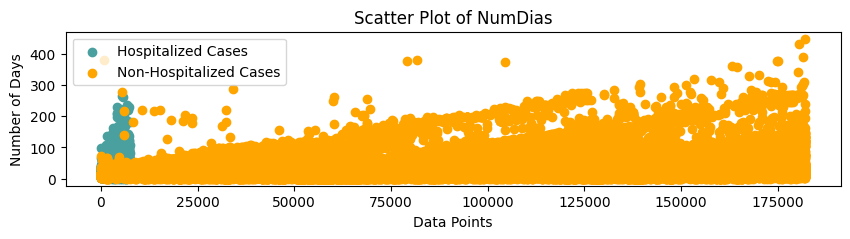

In [10]:
import matplotlib.pyplot as plt

data1 = df_datas_hosp['NumDias']
data2 = df_datas_non_hosp['NumDias']
color1 = '#49A09E'
color2 = 'orange'
figure_size = (10, 2)

# Create a new figure with the specified size
plt.figure(figsize=figure_size)

# Plot the scatter plot for data1
plt.scatter(range(len(data1)), data1, color=color1, label='Hospitalized Cases')

# Plot the scatter plot for data2
plt.scatter(range(len(data2)), data2, color=color2, label='Non-Hospitalized Cases')

# Set the x-axis label
plt.xlabel('Data Points')

# Set the y-axis label
plt.ylabel('Number of Days')

# Set the title
plt.title('Scatter Plot of NumDias')

# Display the legend
plt.legend()

# Display the plot
plt.show()


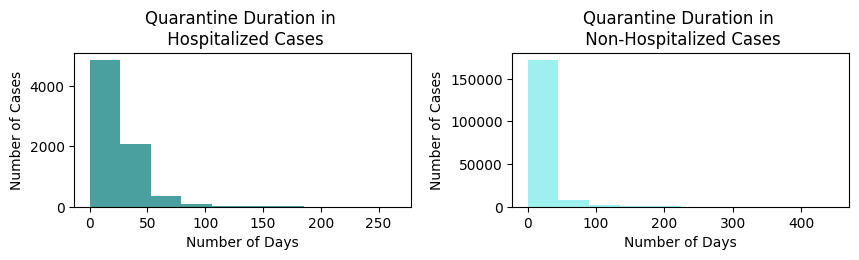

In [11]:
def plot_histograms(data1, data2, color1, color2, figsize):
    # Create a new figure with the specified size
    plt.figure(figsize=figsize)

    # Create subplot grid with 1 row and 2 columns
    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)

    # Plot the first histogram
    counts1, bins1, _ = ax1.hist(data1, color=color1)
    ax1.set_xlabel('Number of Days')
    ax1.set_ylabel('Number of Cases')
    ax1.set_title('Quarantine Duration in \n Hospitalized Cases')

    # Plot the second histogram
    counts2, bins2, _ = ax2.hist(data2, color=color2)
    ax2.set_xlabel('Number of Days')
    ax2.set_ylabel('Number of Cases')
    ax2.set_title('Quarantine Duration in \n Non-Hospitalized Cases')

    # Display the frequency values above each bar
    for rect, count in zip(ax1.patches, counts1):
        height = rect.get_height()

    for rect, count in zip(ax2.patches, counts2):
        height = rect.get_height()

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.3)

    # Display the plot
    plt.show()

data1 = df_datas_hosp['NumDias']
data2 = df_datas_non_hosp['NumDias']
color1 = '#49A09E'
color2 = '#9DF0EE'
figure_size = (10, 2)

plot_histograms(data1, data2, color1, color2, figure_size)

Os outliers dificultavam bastante a visualização dos dados, como dá para comprovar com os histogramas da esquerda (**com** outliers) e da direita (**sem** outliers).

### Meses do ano

In [12]:
df_ano_inteiro = df_datas.copy()
mask = (df_ano_inteiro['DataDiagnostico'] >= '2020-07-01') & (df_ano_inteiro['DataDiagnostico'] <= '2021-06-30')
df_ano_inteiro = df_ano_inteiro.loc[mask]

In [13]:
# Converter número em mês escrito
def number_to_month(number):
    months = {
        '01': 'January',
        '02': 'February',
        '03': 'March',
        '04': 'April',
        '05': 'May',
        '06': 'June',
        '07': 'July',
        '08': 'August',
        '09': 'September',
        '10': 'October',
        '11': 'November',
        '12': 'December'
    }
    return months.get(number, 'Invalid month')

# Converter data em mês
def get_month(data):
  lst = data.split('-')
  ans = lst[1]
  ans = number_to_month(ans)
  return ans

# Aplicar aos datasets
df_ano_inteiro['MesDiagnostico'] = df_ano_inteiro['DataDiagnostico'].apply(get_month)
#df_datas_sem_outliers['MesDiagnostico'] = df_datas['DataDiagnostico'].apply(get_month)

Vamos agora verificar se existe algum mês "inválido". Se sim, essas entradas serão removidas.

In [14]:
print('Com outliers:')
print(df_ano_inteiro.MesDiagnostico.value_counts())
print()
#print('Sem outliers:')
#print(df_datas_sem_outliers.MesDiagnostico.value_counts())

Com outliers:
March        20940
December     18737
November     18619
July         14752
April        14581
January      14313
May          12680
October      12437
February     10269
August        9966
September     8322
June          7744
Name: MesDiagnostico, dtype: int64



In [15]:
len(df_ano_inteiro)

163360

Não existe nenhuma entrada cujo mês tenha sido invalidado.

#### Visualização

Vamos agora vizualizar a distribuição dos casos COVID-19 do nosso dataset consoante os meses do ano.

In [16]:
df_ano_inteiro_hosp = df_ano_inteiro.copy()
mask = (df_ano_inteiro_hosp['FicouInternado'] == 'Sim')
df_ano_inteiro_hosp = df_ano_inteiro_hosp.loc[mask]

df_ano_inteiro_non_hosp = df_ano_inteiro.copy()
mask = (df_ano_inteiro_non_hosp['FicouInternado'] == 'Não')
df_ano_inteiro_non_hosp = df_ano_inteiro_non_hosp.loc[mask]

HOSP: April         8.925686
August        6.100637
December     11.469760
February      6.286117
January       8.761631
July          9.030362
June          4.740451
March        12.818315
May           7.761998
November     11.397527
October       7.613247
September     5.094270
Name: MesDiagnostico, dtype: float64
NON-HOSP: April         8.734257
August        6.091496
December     11.559934
February      6.250278
January       8.824445
July          9.063887
June          4.781866
March        12.694269
May           7.647556
November     11.515475
October       7.697096
September     5.139442
Name: MesDiagnostico, dtype: float64


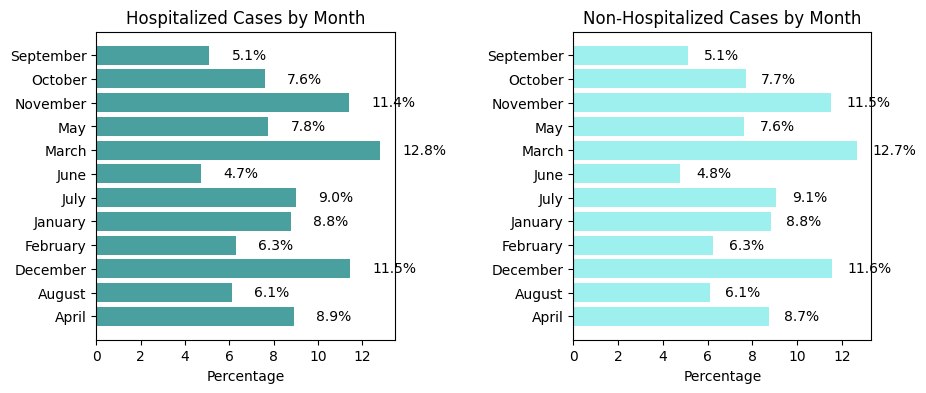

In [17]:
def plot_side_by_side_bars(df1, df2, column):
    # Get the unique values and their counts from column1
    values1 = df1[column].value_counts().sort_index()
    total1 = values1.sum()
    percentages1 = (values1 / total1) * 100
    print("HOSP:",percentages1)

    # Get the unique values and their counts from column2
    values2 = df2[column].value_counts().sort_index()
    total2 = values2.sum()
    percentages2 = (values2 / total2) * 100
    print("NON-HOSP:",percentages2)

    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # Plot the first horizontal bar plot
    ax1.barh(values1.index, percentages1, color='#49A09E')
    ax1.set_xlabel('Percentage')
    ax1.set_title('Hospitalized Cases by Month')

    # Add percentages inside the bars in white
    for i, (value, percentage) in enumerate(zip(values1, percentages1)):
        ax1.text(percentage + 1, i, f'{percentage:.1f}%', va='center', color='black')
        #print(value,percentage)

    # Plot the second horizontal bar plot
    ax2.barh(values2.index, percentages2, color='#9DF0EE')
    ax2.set_xlabel('Percentage')
    ax2.set_title('Non-Hospitalized Cases by Month')

    # Add percentages inside the bars in white
    for i, (value, percentage) in enumerate(zip(values2, percentages2)):
        ax2.text(percentage + 0.7, i, f'{percentage:.1f}%', va='center', color='black')
        #print(value,percentage)

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.6)

    # Show the plot
    plt.show()

# Example usage
# Assuming 'df' is your DataFrame and 'column1' and 'column2' are the column names
plot_side_by_side_bars(df_ano_inteiro,df_ano_inteiro_non_hosp,'MesDiagnostico')

### Estação do Ano

In [18]:
# Converter data em estação do ano
def get_season(date_string):
    # Split the date string into year, month, and day
    year, month, day = map(int, date_string.split('-'))

    # Define the start and end dates for each season
    seasons = {
        'Winter': ((1, 1), (3, 20)),
        'Spring': ((3, 21), (6, 20)),
        'Summer': ((6, 21), (9, 22)),
        'Autumn': ((9, 23), (12, 20))
    }

    # Check if the date falls within the winter season
    if (month, day) >= (12, 21) or (month, day) <= (3, 20):
        return 'Winter'

    # Iterate over the other seasons and check if the date falls within a range
    for season, (start_date, end_date) in seasons.items():
        start_month, start_day = start_date
        end_month, end_day = end_date
        if (month, day) >= (start_month, start_day) and (month, day) <= (end_month, end_day):
            return season

    return 'Invalid date'

# Aplicar aos datasets
df_ano_inteiro_non_hosp['EstacaoDoAno'] = df_ano_inteiro_non_hosp['DataDiagnostico'].apply(get_season)
df_ano_inteiro_hosp['EstacaoDoAno'] = df_ano_inteiro_hosp['DataDiagnostico'].apply(get_season)
df_ano_inteiro['EstacaoDoAno'] = df_ano_inteiro_hosp['DataDiagnostico'].apply(get_season)

In [19]:
df_ano_inteiro_hosp

,DataDiagnostico,DataFinal,NumDias,FicouInternado,MesDiagnostico,EstacaoDoAno
88,2021-06-05,2021-07-05,30,Sim,June,Spring
92,2021-06-28,2021-07-07,9,Sim,June,Summer
204,2021-06-18,2021-07-09,21,Sim,June,Spring
215,2021-06-25,2021-07-05,10,Sim,June,Summer
354,2021-06-20,2021-07-05,15,Sim,June,Spring
...,...,...,...,...,...,...
165390,2020-07-02,2020-07-22,20,Sim,July,Summer
165772,2020-07-02,2020-07-08,6,Sim,July,Summer
165778,2020-07-01,2020-07-24,23,Sim,July,Summer
165843,2020-07-01,2020-07-06,5,Sim,July,Summer


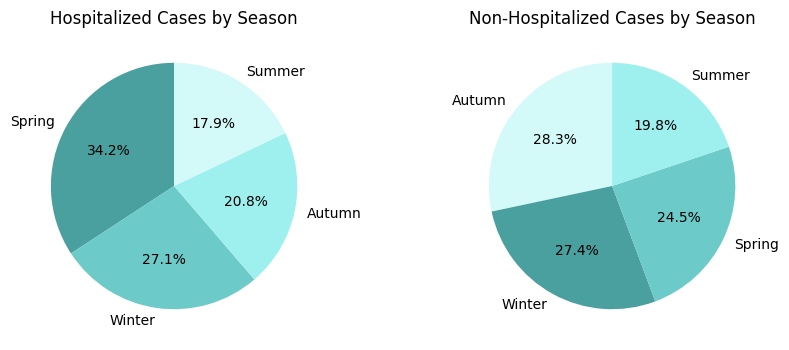

In [20]:
def plot_side_by_side_pie_charts(df1, df2, column):
    # Count the occurrences of each class in column1
    class_counts1 = df1[column].value_counts()
    labels1 = class_counts1.index.tolist()
    counts1 = class_counts1.tolist()

    # Count the occurrences of each class in column2
    class_counts2 = df2[column].value_counts()
    labels2 = class_counts2.index.tolist()
    counts2 = class_counts2.tolist()

    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # Plot the first pie chart
    ax1.pie(counts1, labels=labels1, autopct='%1.1f%%', startangle=90, colors=['#49A09E','#6CCAC8','#9DF0EE','#D3F9F8'])
    ax1.set_aspect('equal')  # Equal aspect ratio ensures a circular pie chart
    ax1.set_title('Hospitalized Cases by Season')

    # Plot the second pie chart
    ax2.pie(counts2, labels=labels2, autopct='%1.1f%%', startangle=90, colors=['#D3F9F8','#49A09E','#6CCAC8','#9DF0EE'])
    ax2.set_aspect('equal')  # Equal aspect ratio ensures a circular pie chart
    ax2.set_title('Non-Hospitalized Cases by Season')

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.3)

    # Show the plot
    plt.show()

# Example usage
# Assuming 'df' is your DataFrame and 'column1' and 'column2' are the column names
plot_side_by_side_pie_charts(df_ano_inteiro,df_ano_inteiro_non_hosp, 'EstacaoDoAno')


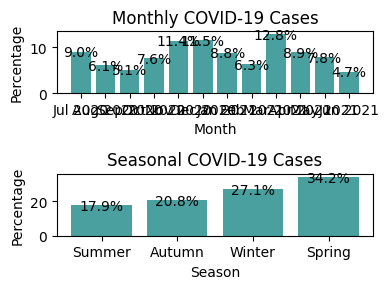

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Monthly data
months = ['Jul 2020', 'Aug 2020', 'Sep 2020', 'Oct 2020', 'Nov 2020', 'Dec 2020',
          'Jan 2021', 'Feb 2021', 'Mar 2021', 'Apr 2021', 'May 2021', 'Jun 2021']
monthly_values = [9.0, 6.1, 5.1, 7.6, 11.4, 11.5, 8.8, 6.3, 12.8, 8.9, 7.8, 4.7]

# Season data
seasons = ['Summer', 'Autumn', 'Winter', 'Spring']
season_values = [17.9, 20.8, 27.1, 34.2]

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(4, 3))

# Plot monthly data
axs[0].bar(months, monthly_values, color='#49A09E')
axs[0].set_title('Monthly COVID-19 Cases')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Percentage')

# Add percentage labels on top of each bar
for i, v in enumerate(monthly_values):
    axs[0].text(i, v - 1, str(v)+'%', color='black', ha='center')

# Plot season data
axs[1].bar(seasons, season_values, color='#49A09E')
axs[1].set_title('Seasonal COVID-19 Cases')
axs[1].set_xlabel('Season')
axs[1].set_ylabel('Percentage')

# Add percentage labels on top of each bar
for i, v in enumerate(season_values):
    axs[1].text(i, v - 3, str(v)+'%', color='black', ha='center')

# Display the plots
plt.tight_layout()
plt.show()


# Dados Demográficos

Vamos agora criar um sub-dataset que contém apenas Idade e Sexo de cada caso.

In [ ]:
df_demo = df[['Idade','Sexo','FicouInternado']].copy()

Com este sub-dataset, vamos analisar a distribuição das idades nos doentes COVID-19 do nosso dataset (e os respetivos outliers), e faremos uma análise em paralelo - com e sem outliers - em tudo o que fizermos com a outra feature.

### Idade

Tal como aconteceu com a duração da doença, também aqui, na coluna da idade vamos ter vários outliers. Repare-se na caixa-de-bigodes.

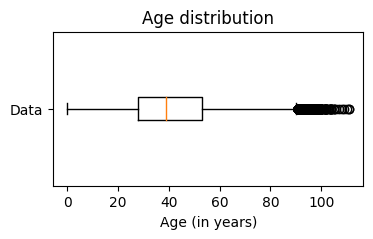

In [ ]:
# Criar caixa de bigodes horizontal
fig, ax = plt.subplots(figsize=(4,2))
ax.boxplot(df_demo['Idade'], vert=False)

# Set plot properties
ax.set_title('Age distribution')
ax.set_xlabel('Age (in years)')
ax.set_yticklabels(['Data'])
plt.show()

In [ ]:
df_demo.Idade.describe()

count    189625.000000
mean         41.074225
std          17.676227
min           0.000000
25%          28.000000
50%          39.000000
75%          53.000000
max         111.000000
Name: Idade, dtype: float64

Vamos descobrir os limites, iterativamente.

In [ ]:
df_demo_hosp = df_demo[df_demo['FicouInternado'] == 'Sim'].copy()
df_demo_non_hosp = df_demo[df_demo['FicouInternado'] == 'Não'].copy()

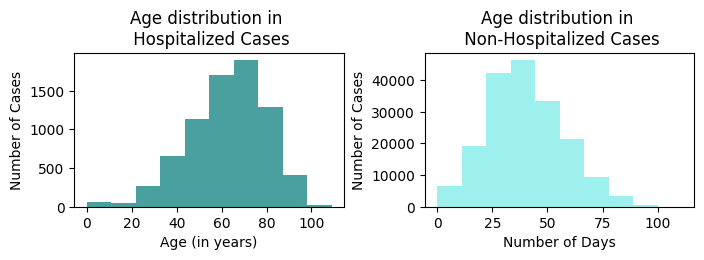

In [ ]:
def plot_histograms(data1, data2, color1, color2, figsize):
    # Create a new figure with the specified size
    plt.figure(figsize=figsize)

    # Create subplot grid with 1 row and 2 columns
    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)

    # Plot the first histogram
    counts1, bins1, _ = ax1.hist(data1, color=color1)
    ax1.set_xlabel('Age (in years)')
    ax1.set_ylabel('Number of Cases')
    ax1.set_title('Age distribution in \n Hospitalized Cases')

    # Plot the second histogram
    counts2, bins2, _ = ax2.hist(data2, color=color2)
    ax2.set_xlabel('Number of Days')
    ax2.set_ylabel('Number of Cases')
    ax2.set_title('Age distribution in \n Non-Hospitalized Cases')

    # Display the frequency values above each bar
    for rect, count in zip(ax1.patches, counts1):
        height = rect.get_height()

    for rect, count in zip(ax2.patches, counts2):
        height = rect.get_height()

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.3)

    # Display the plot
    plt.show()

data1 = df_demo_hosp['Idade']
data2 = df_demo_non_hosp['Idade']
color1 = '#49A09E'
color2 = '#9DF0EE'
figure_size = (8, 2)

plot_histograms(data1, data2, color1, color2, figure_size)

### Sexo

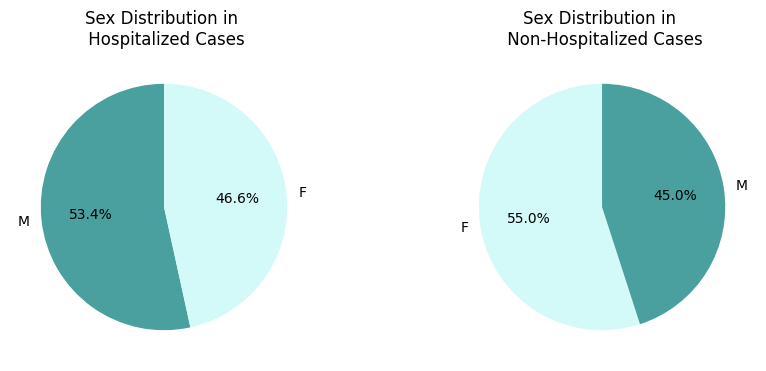

In [ ]:
def plot_side_by_side_pie_charts(df1, df2, column):
    # Count the occurrences of each class in column1
    class_counts1 = df1[column].value_counts()
    labels1 = class_counts1.index.tolist()
    counts1 = class_counts1.tolist()

    # Count the occurrences of each class in column2
    class_counts2 = df2[column].value_counts()
    labels2 = class_counts2.index.tolist()
    counts2 = class_counts2.tolist()

    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # Plot the first pie chart
    ax1.pie(counts1, labels=labels1, autopct='%1.1f%%', startangle=90, colors=['#49A09E','#D3F9F8'])
    ax1.set_aspect('equal')  # Equal aspect ratio ensures a circular pie chart
    ax1.set_title('Sex Distribution in \n Hospitalized Cases')

    # Plot the second pie chart
    ax2.pie(counts2, labels=labels2, autopct='%1.1f%%', startangle=90, colors=['#D3F9F8','#49A09E'])
    ax2.set_aspect('equal')  # Equal aspect ratio ensures a circular pie chart
    ax2.set_title('Sex Distribution in \n Non-Hospitalized Cases')
    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.3)

    # Show the plot
    plt.show()

# Example usage
# Assuming 'df' is your DataFrame and 'column1' and 'column2' are the column names
plot_side_by_side_pie_charts(df_demo_hosp,df_demo_non_hosp, 'Sexo')


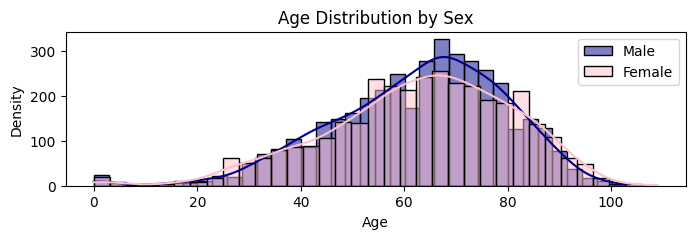

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_age_distribution(df, gender_column, age_column):
    # Filter the DataFrame by gender
    male_data = df[df[gender_column] == 'M'][age_column]
    female_data = df[df[gender_column] == 'F'][age_column]

    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=(8, 2))

    # Plot histograms with density curves
    sns.histplot(data=male_data, kde=True, color='darkblue', label='Male', ax=ax)
    sns.histplot(data=female_data, kde=True, color='pink', label='Female', ax=ax)

    # Set labels and title
    ax.set_xlabel('Age')
    ax.set_ylabel('Density')
    ax.set_title('Age Distribution by Sex')

    # Add legend
    ax.legend()

    # Show the plot
    plt.show()

plot_age_distribution(df_demo_hosp, 'Sexo', 'Idade')


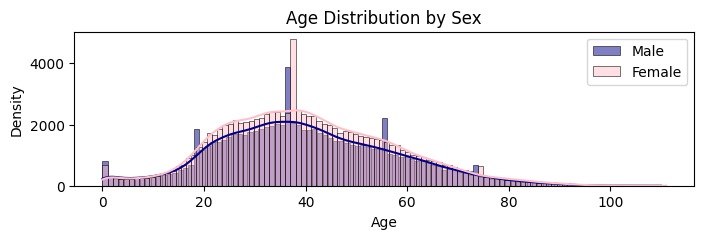

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_age_distribution(df, gender_column, age_column):
    # Filter the DataFrame by gender
    male_data = df[df[gender_column] == 'M'][age_column]
    female_data = df[df[gender_column] == 'F'][age_column]

    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=(8, 2))

    # Plot histograms with density curves
    sns.histplot(data=male_data, kde=True, color='darkblue', label='Male', ax=ax)
    sns.histplot(data=female_data, kde=True, color='pink', label='Female', ax=ax)

    # Set labels and title
    ax.set_xlabel('Age')
    ax.set_ylabel('Density')
    ax.set_title('Age Distribution by Sex')

    # Add legend
    ax.legend()

    # Show the plot
    plt.show()

plot_age_distribution(df_demo_non_hosp, 'Sexo', 'Idade')


### Evolução

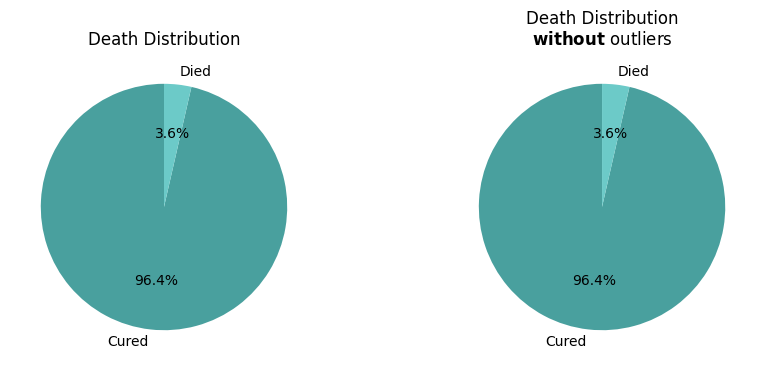

In [ ]:
df = df.replace(['Cura','Óbito pelo COVID-19'],['Cured','Died'])
def plot_side_by_side_pie_charts(df1, df2, column):
    # Count the occurrences of each class in column1
    class_counts1 = df1[column].value_counts()
    labels1 = class_counts1.index.tolist()
    counts1 = class_counts1.tolist()

    # Count the occurrences of each class in column2
    class_counts2 = df2[column].value_counts()
    labels2 = class_counts2.index.tolist()
    counts2 = class_counts2.tolist()

    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # Plot the first pie chart
    ax1.pie(counts1, labels=labels1, autopct='%1.1f%%', startangle=90, colors=['#49A09E','#6CCAC8','#9DF0EE','#D3F9F8'])
    ax1.set_aspect('equal')  # Equal aspect ratio ensures a circular pie chart
    ax1.set_title('Death Distribution')

    # Plot the second pie chart
    ax2.pie(counts2, labels=labels2, autopct='%1.1f%%', startangle=90, colors=['#49A09E','#6CCAC8','#9DF0EE','#D3F9F8'])
    ax2.set_aspect('equal')  # Equal aspect ratio ensures a circular pie chart
    ax2.set_title('Death Distribution' + '\n' + r'$\bf{without}$ outliers')

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.3)

    # Show the plot
    plt.show()

# Example usage
# Assuming 'df' is your DataFrame and 'column1' and 'column2' are the column names
plot_side_by_side_pie_charts(df,df, 'Evolucao')


### Internamento

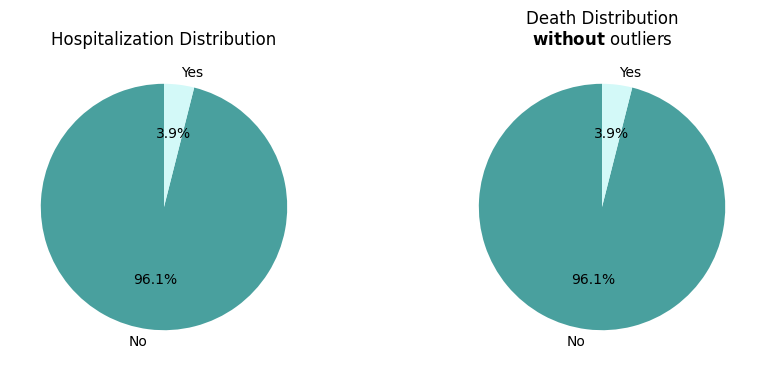

In [ ]:
df = df.replace(['Sim','Não'],['Yes','No'])
def plot_side_by_side_pie_charts(df1, df2, column):
    # Count the occurrences of each class in column1
    class_counts1 = df1[column].value_counts()
    labels1 = class_counts1.index.tolist()
    counts1 = class_counts1.tolist()

    # Count the occurrences of each class in column2
    class_counts2 = df2[column].value_counts()
    labels2 = class_counts2.index.tolist()
    counts2 = class_counts2.tolist()

    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # Plot the first pie chart
    ax1.pie(counts1, labels=labels1, autopct='%1.1f%%', startangle=90, colors=['#49A09E','#D3F9F8'])
    ax1.set_aspect('equal')  # Equal aspect ratio ensures a circular pie chart
    ax1.set_title('Hospitalization Distribution')

    # Plot the second pie chart
    ax2.pie(counts2, labels=labels2, autopct='%1.1f%%', startangle=90, colors=['#49A09E','#D3F9F8'])
    ax2.set_aspect('equal')  # Equal aspect ratio ensures a circular pie chart
    ax2.set_title('Death Distribution' + '\n' + r'$\bf{without}$ outliers')

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.3)

    # Show the plot
    plt.show()

# Example usage
# Assuming 'df' is your DataFrame and 'column1' and 'column2' are the column names
plot_side_by_side_pie_charts(df,df, 'FicouInternado')

df = df.replace(['Yes','No'],['Sim','Não'])

### Hospitalization and Death

Como os resultados foram inconclusivos, vamos avançar para a análise, em paralelo, dos sintomas e das comorbilidades e avaliamos de novo aí, os resultados obtidos.

### Sintomas

In [ ]:
df

,DataDiagnostico,Evolucao,Sexo,RacaCor,Gestante,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,...,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado,ProfissionalSaude,PossuiDeficiencia,DataFinal,NumDias,Idade
0,2021-06-27,Cured,M,Parda,0.0,Não,Não,Não,Não,Não,...,Não,Não,Não,Não,Não,Não,Não,2021-07-09,12,24
1,2021-06-29,Cured,M,Parda,0.0,Não,Não,Não,Não,Sim,...,Não,Não,Não,Não,Não,Não,Não,2021-07-09,10,26
2,2021-06-16,Cured,M,Branca,0.0,Sim,Não,Sim,Sim,Sim,...,Não,Não,Não,Não,Não,Não,Não,2021-06-26,10,32
3,2021-06-21,Cured,F,Parda,0.0,Não,Não,Sim,Não,Não,...,Não,Não,Não,Não,Não,Não,Não,2021-06-30,9,22
4,2021-07-05,Cured,F,Parda,0.0,Não,Não,Sim,Sim,Sim,...,Não,Não,Não,Não,Não,Não,Não,2021-07-09,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189620,2020-03-17,Cured,M,Branca,0.0,Sim,Não,Sim,Não,Não,...,Não,Não,Não,Não,Não,Não,Não,2020-04-15,29,54
189621,2020-03-13,Cured,M,Parda,0.0,Sim,Sim,Sim,Não,Sim,...,Não,Não,Não,Não,Não,Não,Não,2020-04-15,33,28
189622,2020-03-15,Cured,M,Branca,0.0,Sim,Sim,Sim,Não,Não,...,Não,Não,Não,Não,Não,Não,Não,2020-04-14,30,41
189623,2020-03-14,Cured,F,Parda,0.0,Não,Não,Não,Sim,Não,...,Não,Não,Não,Não,Não,Não,Não,2020-04-15,32,57


In [ ]:
df = df.replace(['Yes','No'],['Sim','Não'])

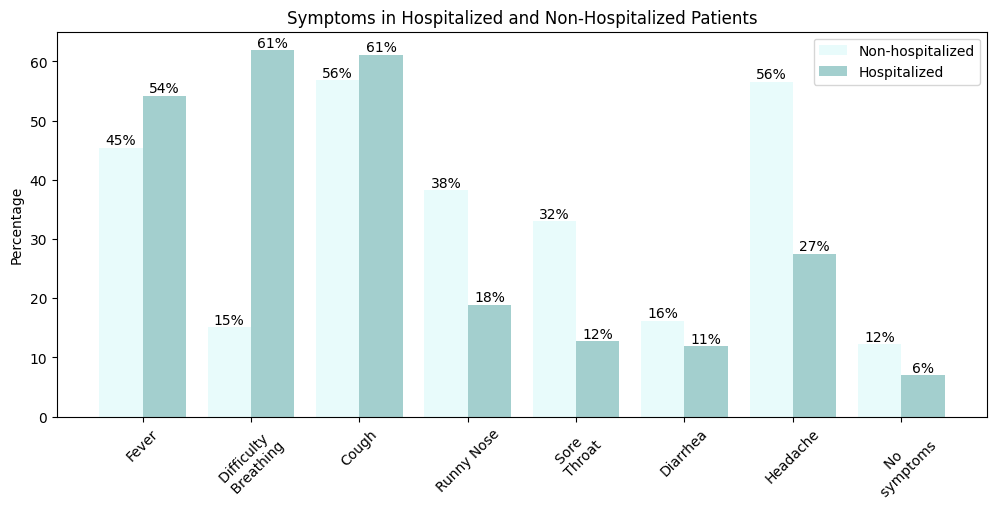

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

df_sintomas_hosp = df[['Febre','DificuldadeRespiratoria','Tosse','Coriza','DorGarganta','Diarreia','Cefaleia','FicouInternado']].copy()
df_sintomas_hosp = df_sintomas_hosp[df_sintomas_hosp['FicouInternado'] == 'Sim']

df_sintomas_non_hosp = df[['Febre','DificuldadeRespiratoria','Tosse','Coriza','DorGarganta','Diarreia','Cefaleia','FicouInternado']].copy()
df_sintomas_non_hosp = df_sintomas_non_hosp[df_sintomas_non_hosp['FicouInternado'] == 'Não']


total_hosp = len(df_sintomas_hosp)
sintomas = ['Febre','DificuldadeRespiratoria','Tosse','Coriza','DorGarganta','Diarreia','Cefaleia']

percentagens_hosp = []
for sintoma in sintomas:
  num_pessoas_com_sintoma = len(df_sintomas_hosp[df_sintomas_hosp['{}'.format(sintoma)] == 'Sim'])
  percentagem = (num_pessoas_com_sintoma/total_hosp)*100
  tupulo = (sintoma,percentagem)
  percentagens_hosp.append(tupulo)

num_pessoas_hosp_sem_sintoma = len(df_sintomas_hosp[(df_sintomas_hosp['Febre']=='Não') &
                                                    (df_sintomas_hosp['DificuldadeRespiratoria']=='Não') &
                                                    (df_sintomas_hosp['Tosse']=='Não') &
                                                    (df_sintomas_hosp['Coriza']=='Não') &
                                                    (df_sintomas_hosp['DorGarganta']=='Não') &
                                                    (df_sintomas_hosp['Diarreia']=='Não') &
                                                    (df_sintomas_hosp['Cefaleia']=='Não')])

percentagem_sem_sintomas = (num_pessoas_hosp_sem_sintoma/total_hosp)*100
ultimo_tupulo_hosp = ('Sem sintomas', percentagem_sem_sintomas)
percentagens_hosp.append(ultimo_tupulo_hosp)



total_non_hosp = len(df_sintomas_non_hosp)
sintomas = ['Febre','DificuldadeRespiratoria','Tosse','Coriza','DorGarganta','Diarreia','Cefaleia']

percentagens_non_hosp = []
for sintoma in sintomas:
  num_pessoas_com_sintoma = len(df_sintomas_non_hosp[df_sintomas_non_hosp['{}'.format(sintoma)] == 'Sim'])
  percentagem = (num_pessoas_com_sintoma/total_non_hosp)*100
  tupulo = (sintoma,percentagem)
  percentagens_non_hosp.append(tupulo)

num_pessoas_non_hosp_sem_sintoma = len(df_sintomas_non_hosp[(df_sintomas_non_hosp['Febre']=='Não') &
                                                    (df_sintomas_non_hosp['DificuldadeRespiratoria']=='Não') &
                                                    (df_sintomas_non_hosp['Tosse']=='Não') &
                                                    (df_sintomas_non_hosp['Coriza']=='Não') &
                                                    (df_sintomas_non_hosp['DorGarganta']=='Não') &
                                                    (df_sintomas_non_hosp['Diarreia']=='Não') &
                                                    (df_sintomas_non_hosp['Cefaleia']=='Não')])

percentagem_sem_sintomas = (num_pessoas_non_hosp_sem_sintoma/total_non_hosp)*100
ultimo_tupulo_non_hosp = ('Sem sintomas', percentagem_sem_sintomas)
percentagens_non_hosp.append(ultimo_tupulo_non_hosp)



x = ["Fever", "Difficulty \n Breathing", "Cough", "Runny Nose","Sore \n Throat",
     "Diarrhea","Headache","No \n symptoms"]

# Assuming hospitalized_data and non_hospitalized_data are your lists of tuples
# Replace these with your actual list names

non_hospitalized_data = percentagens_non_hosp
hospitalized_data = percentagens_hosp


# Separate the symptom names and percentages
symptoms = [i[0] for i in hospitalized_data]
non_hospitalized_percentages = [i[1] for i in non_hospitalized_data]
hospitalized_percentages = [i[1] for i in hospitalized_data]


# Setting the positions and width for the bars
pos = np.arange(len(symptoms))
width = 0.4

# Plotting the bars
fig, ax = plt.subplots(figsize=(12, 5))

# Create a bar with non-hospitalized data, in position pos + some width buffer
non_hospitalized_bars = plt.bar(pos, non_hospitalized_percentages, width, alpha=0.5, color='#D3F9F8', label='Non-hospitalized')

# Create a bar with hospitalized data, in position pos
hospitalized_bars = plt.bar(pos + width, hospitalized_percentages, width, alpha=0.5, color='#49A09E', label='Hospitalized')



# Function to add labels to bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height,
                '%d' % int(height) + '%', ha='center', va='bottom', color='black')

# Add labels to bars
add_labels(non_hospitalized_bars)
add_labels(hospitalized_bars)

# Set the y axis label
ax.set_ylabel('Percentage')

# Set the chart's title
ax.set_title('Symptoms in Hospitalized and Non-Hospitalized Patients')

# Set the position of the x ticks
ax.set_xticks(pos + width / 2)

# Set the labels for the x ticks
ax.set_xticklabels(x, rotation=45)

# Adding the legend and showing the plot
plt.legend(['Non-hospitalized','Hospitalized'], loc='upper right')
plt.show()


In [ ]:
percentagens_hosp

[('Febre', 54.20848387528435),
 ('DificuldadeRespiratoria', 61.92961327445471),
 ('Tosse', 61.153485882510374),
 ('Coriza', 18.92145055533253),
 ('DorGarganta', 12.73919443329319),
 ('Diarreia', 11.856014987287569),
 ('Cefaleia', 27.552522414023816),
 ('Sem sintomas', 6.958383513983675)]

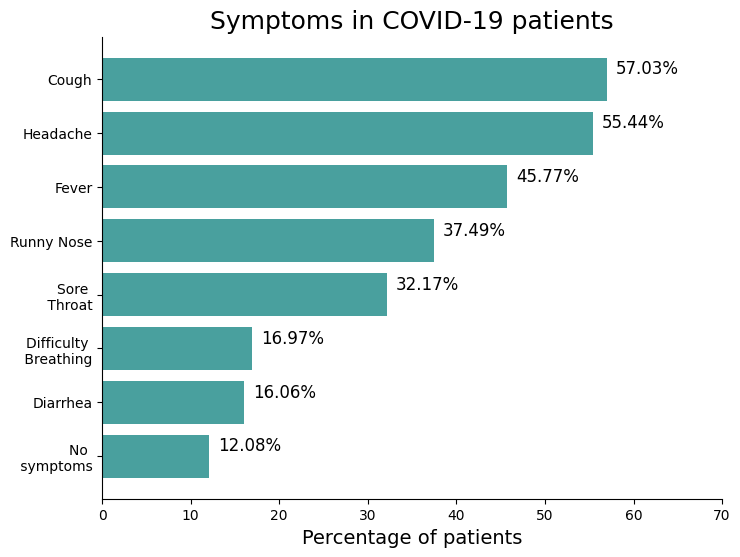

In [ ]:
x = ["Fever", "Difficulty \n Breathing", "Cough", "Runny Nose","Sore \n Throat",
     "Diarrhea","Headache","No \n symptoms"]

no_symptoms = len(df[(df['Febre'] == 'Não') &
                             (df['DificuldadeRespiratoria'] == 'Não') &
                             (df['Tosse'] == 'Não') &
                             (df['Coriza'] == 'Não') &
                             (df['DorGarganta'] == 'Não') &
                             (df['Diarreia'] == 'Não') &
                             (df['Cefaleia'] == 'Não')])

total = len(df)

febre_sim = len(df[df['Febre']=='Sim'])
febre_nao = len(df[df['Febre']=='Não'])

respirar_sim = len(df[df["DificuldadeRespiratoria"]=='Sim'])
respirar_nao = len(df[df["DificuldadeRespiratoria"]=='Não'])

tosse_sim = len(df[df["Tosse"]=='Sim'])
tosse_nao = len(df[df["Tosse"]=='Não'])

coriza_sim = len(df[df["Coriza"]=='Sim'])
coriza_nao = len(df[df["Coriza"]=='Não'])

garganta_sim = len(df[df["DorGarganta"]=='Sim'])
garganta_nao = len(df[df["DorGarganta"]=='Não'])

diarreia_sim = len(df[df["Diarreia"]=='Sim'])
diarreia_nao = len(df[df["Diarreia"]=='Não'])

cefaleia_sim = len(df[df["Cefaleia"]=='Sim'])
cefaleia_nao = len(df[df["Cefaleia"]=='Não'])

y1=[febre_sim, respirar_sim, tosse_sim, coriza_sim, garganta_sim, diarreia_sim,
   cefaleia_sim, no_symptoms]

percentage = []
for i in range(len(y1)):
    pct = (y1[i]/total) * 100
    percentage.append(round(pct,2))


# Create a list of tuples, each containing a symptom and its percentage
symptoms_percentages = list(zip(x, percentage))

# Sort the list of tuples by the percentage (second item of each tuple), in descending order
symptoms_percentages.sort(key=lambda x: x[1], reverse=True)

# Unzip the sorted list of tuples back into two lists
x_sorted, percentage_sorted = zip(*symptoms_percentages)


fig, ax = plt.subplots(figsize=(8,6))


ax.barh(x_sorted, percentage_sorted, align='center', color='#49A09E')

for i, v in enumerate(percentage_sorted):
    ax.text(v + 1, i - 0.1, str(v) + '%', color='black', fontsize=12)

ax.set_xlim([0, 70])
ax.set_xlabel('Percentage of patients', fontsize=14)
ax.set_title('Symptoms in COVID-19 patients', fontsize=18)
ax.invert_yaxis()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()

### Comorbilidades

In [ ]:
df

,DataDiagnostico,Evolucao,Sexo,RacaCor,Gestante,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,...,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado,ProfissionalSaude,PossuiDeficiencia,DataFinal,NumDias,Idade
0,2021-06-27,Cured,M,Parda,0.0,Não,Não,Não,Não,Não,...,Não,Não,Não,Não,Não,Não,Não,2021-07-09,12,24
1,2021-06-29,Cured,M,Parda,0.0,Não,Não,Não,Não,Sim,...,Não,Não,Não,Não,Não,Não,Não,2021-07-09,10,26
2,2021-06-16,Cured,M,Branca,0.0,Sim,Não,Sim,Sim,Sim,...,Não,Não,Não,Não,Não,Não,Não,2021-06-26,10,32
3,2021-06-21,Cured,F,Parda,0.0,Não,Não,Sim,Não,Não,...,Não,Não,Não,Não,Não,Não,Não,2021-06-30,9,22
4,2021-07-05,Cured,F,Parda,0.0,Não,Não,Sim,Sim,Sim,...,Não,Não,Não,Não,Não,Não,Não,2021-07-09,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189620,2020-03-17,Cured,M,Branca,0.0,Sim,Não,Sim,Não,Não,...,Não,Não,Não,Não,Não,Não,Não,2020-04-15,29,54
189621,2020-03-13,Cured,M,Parda,0.0,Sim,Sim,Sim,Não,Sim,...,Não,Não,Não,Não,Não,Não,Não,2020-04-15,33,28
189622,2020-03-15,Cured,M,Branca,0.0,Sim,Sim,Sim,Não,Não,...,Não,Não,Não,Não,Não,Não,Não,2020-04-14,30,41
189623,2020-03-14,Cured,F,Parda,0.0,Não,Não,Não,Sim,Não,...,Não,Não,Não,Não,Não,Não,Não,2020-04-15,32,57


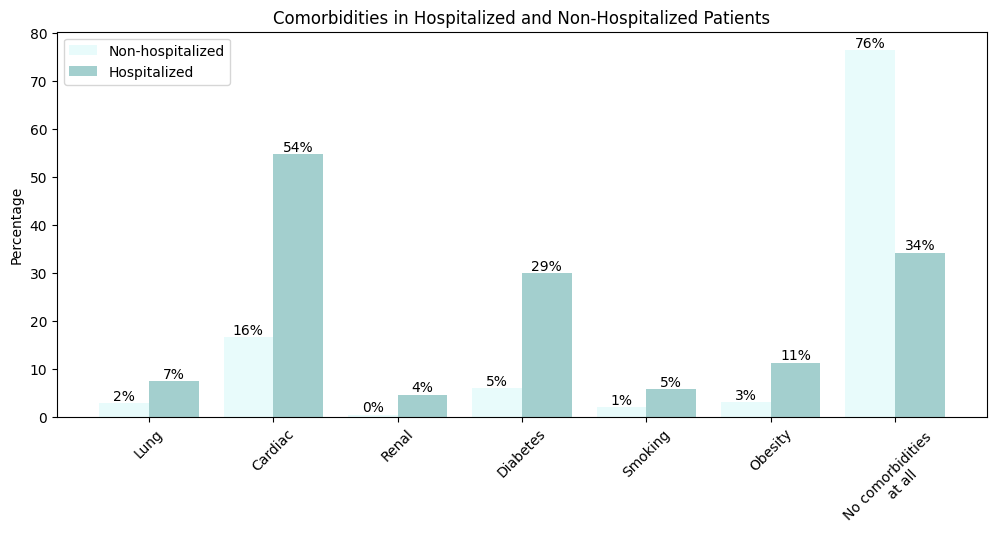

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

df_comorbidades_hosp = df[['ComorbidadePulmao','ComorbidadeCardio','ComorbidadeRenal','ComorbidadeDiabetes','ComorbidadeTabagismo','ComorbidadeObesidade','FicouInternado']].copy()
df_comorbidades_hosp = df_comorbidades_hosp[df_comorbidades_hosp['FicouInternado'] == 'Sim']

df_comorbidades_non_hosp = df[['ComorbidadePulmao','ComorbidadeCardio','ComorbidadeRenal','ComorbidadeDiabetes','ComorbidadeTabagismo','ComorbidadeObesidade','FicouInternado']].copy()
df_comorbidades_non_hosp = df_comorbidades_non_hosp[df_comorbidades_non_hosp['FicouInternado'] == 'Não']


total_hosp = len(df_comorbidades_hosp)
comorbidades = ['ComorbidadePulmao','ComorbidadeCardio','ComorbidadeRenal','ComorbidadeDiabetes','ComorbidadeTabagismo','ComorbidadeObesidade']

percentagens_hosp = []
for comorbidade in comorbidades:
  num_pessoas_com_comorbidade = len(df_comorbidades_hosp[df_comorbidades_hosp['{}'.format(comorbidade)] == 'Sim'])
  percentagem = (num_pessoas_com_comorbidade/total_hosp)*100
  tupulo = (comorbidade,percentagem)
  percentagens_hosp.append(tupulo)

num_pessoas_hosp_sem_comorbidade = len(df_comorbidades_hosp[(df_comorbidades_hosp['ComorbidadePulmao']=='Não') &
                                                    (df_comorbidades_hosp['ComorbidadeCardio']=='Não') &
                                                    (df_comorbidades_hosp['ComorbidadeRenal']=='Não') &
                                                    (df_comorbidades_hosp['ComorbidadeDiabetes']=='Não') &
                                                    (df_comorbidades_hosp['ComorbidadeTabagismo']=='Não') &
                                                    (df_comorbidades_hosp['ComorbidadeObesidade']=='Não')])

percentagem_sem_comorbidades = (num_pessoas_hosp_sem_comorbidade/total_hosp)*100
ultimo_tupulo_hosp = ('Sem comorbidades', percentagem_sem_comorbidades)
percentagens_hosp.append(ultimo_tupulo_hosp)



total_non_hosp = len(df_comorbidades_non_hosp)
comorbidades = ['ComorbidadePulmao','ComorbidadeCardio','ComorbidadeRenal','ComorbidadeDiabetes','ComorbidadeTabagismo','ComorbidadeObesidade']

percentagens_non_hosp = []
for comorbidade in comorbidades:
  num_pessoas_com_comorbidade = len(df_comorbidades_non_hosp[df_comorbidades_non_hosp['{}'.format(comorbidade)] == 'Sim'])
  percentagem = (num_pessoas_com_comorbidade/total_non_hosp)*100
  tupulo = (comorbidade,percentagem)
  percentagens_non_hosp.append(tupulo)

num_pessoas_non_hosp_sem_comorbidade = len(df_comorbidades_non_hosp[(df_comorbidades_non_hosp['ComorbidadePulmao']=='Não') &
                                                    (df_comorbidades_non_hosp['ComorbidadeCardio']=='Não') &
                                                    (df_comorbidades_non_hosp['ComorbidadeRenal']=='Não') &
                                                    (df_comorbidades_non_hosp['ComorbidadeDiabetes']=='Não') &
                                                    (df_comorbidades_non_hosp['ComorbidadeTabagismo']=='Não') &
                                                    (df_comorbidades_non_hosp['ComorbidadeObesidade']=='Não')])

percentagem_sem_comorbidades = (num_pessoas_non_hosp_sem_comorbidade/total_non_hosp)*100
ultimo_tupulo_non_hosp = ('Sem comorbidades', percentagem_sem_comorbidades)
percentagens_non_hosp.append(ultimo_tupulo_non_hosp)



x = ["Lung", "Cardiac", "Renal", "Diabetes","Smoking",
     "Obesity", "No comorbidities \n at all"]

# Assuming hospitalized_data and non_hospitalized_data are your lists of tuples
# Replace these with your actual list names

non_hospitalized_data = percentagens_non_hosp
hospitalized_data = percentagens_hosp


# Separate the symptom names and percentages
symptoms = [i[0] for i in hospitalized_data]
non_hospitalized_percentages = [i[1] for i in non_hospitalized_data]
hospitalized_percentages = [i[1] for i in hospitalized_data]


# Setting the positions and width for the bars
pos = np.arange(len(symptoms))
width = 0.4

# Plotting the bars
fig, ax = plt.subplots(figsize=(12, 5))

# Create a bar with non-hospitalized data, in position pos + some width buffer
non_hospitalized_bars = plt.bar(pos, non_hospitalized_percentages, width, alpha=0.5, color='#D3F9F8', label='Non-hospitalized')

# Create a bar with hospitalized data, in position pos
hospitalized_bars = plt.bar(pos + width, hospitalized_percentages, width, alpha=0.5, color='#49A09E', label='Hospitalized')



# Function to add labels to bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height,
                '%d' % int(height) + '%', ha='center', va='bottom', color='black')

# Add labels to bars
add_labels(non_hospitalized_bars)
add_labels(hospitalized_bars)

# Set the y axis label
ax.set_ylabel('Percentage')

# Set the chart's title
ax.set_title('Comorbidities in Hospitalized and Non-Hospitalized Patients')

# Set the position of the x ticks
ax.set_xticks(pos + width / 2)

# Set the labels for the x ticks
ax.set_xticklabels(x, rotation=45)

# Adding the legend and showing the plot
plt.legend(['Non-hospitalized','Hospitalized'], loc='upper left')
plt.show()


In [ ]:
percentagens_hosp


[('ComorbidadePulmao', 7.426736250501806),
 ('ComorbidadeCardio', 54.67683661180249),
 ('ComorbidadeRenal', 4.589856817877693),
 ('ComorbidadeDiabetes', 29.934430616887465),
 ('ComorbidadeTabagismo', 5.794192426067175),
 ('ComorbidadeObesidade', 11.240465676435168),
 ('Sem comorbidades', 34.203131272581295)]

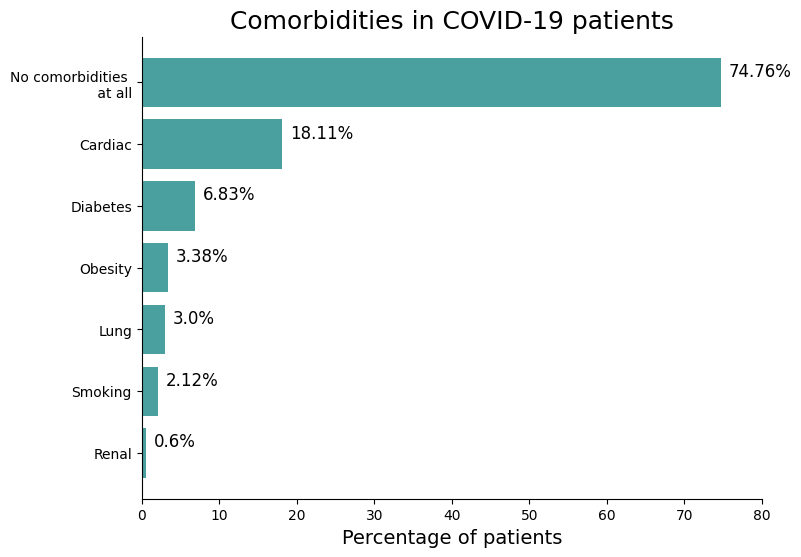

In [ ]:
x = ["Lung", "Cardiac", "Renal", "Diabetes","Smoking",
     "Obesity", "No comorbidities \n at all"]

no_chronics = len(df[(df['ComorbidadeCardio'] == 'Não') &
                             (df['ComorbidadePulmao'] == 'Não') &
                             (df['ComorbidadeRenal'] == 'Não') &
                             (df['ComorbidadeDiabetes'] == 'Não') &
                             (df['ComorbidadeTabagismo'] == 'Não') &
                             (df['ComorbidadeObesidade'] == 'Não')])
total = len(df)

pulmao_sim = len(df[df['ComorbidadePulmao']=='Sim'])
pulmao_nao = len(df[df['ComorbidadePulmao']=='Não'])

cardio_sim = len(df[df["ComorbidadeCardio"]=='Sim'])
cardio_nao = len(df[df["ComorbidadeCardio"]=='Não'])

renal_sim = len(df[df["ComorbidadeRenal"]=='Sim'])
renal_nao = len(df[df["ComorbidadeRenal"]=='Não'])

diabetes_sim = len(df[df["ComorbidadeDiabetes"]=='Sim'])
diabetes_nao = len(df[df["ComorbidadeDiabetes"]=='Não'])

tabaco_sim = len(df[df["ComorbidadeTabagismo"]=='Sim'])
tabaco_nao = len(df[df["ComorbidadeTabagismo"]=='Não'])

obesidade_sim = len(df[df["ComorbidadeObesidade"]=='Sim'])
obesidade_nao = len(df[df["ComorbidadeObesidade"]=='Não'])


y1=[pulmao_sim, cardio_sim, renal_sim, diabetes_sim, tabaco_sim, obesidade_sim, no_chronics]

percentage = []
for i in range(len(y1)):
    pct = (y1[i]/total) * 100
    percentage.append(round(pct,2))

# Create a list of tuples, each containing a symptom and its percentage
symptoms_percentages = list(zip(x, percentage))

# Sort the list of tuples by the percentage (second item of each tuple), in descending order
symptoms_percentages.sort(key=lambda x: x[1], reverse=True)

# Unzip the sorted list of tuples back into two lists
x_sorted, percentage_sorted = zip(*symptoms_percentages)


fig, ax = plt.subplots(figsize=(8,6))

ax.barh(x_sorted, percentage_sorted, align='center', color='#49A09E')

for i, v in enumerate(percentage_sorted):
    ax.text(v + 1, i - 0.1, str(v) + '%', color='black', fontsize=12)

ax.set_xlim([0, 80])
ax.set_xlabel('Percentage of patients', fontsize=14)
ax.set_title('Comorbidities in COVID-19 patients', fontsize=18)
ax.invert_yaxis()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()

### Etnia

In [28]:
df_hosp = df.copy()
mask = (df_hosp['FicouInternado'] == 'Sim')
df_hosp = df_hosp.loc[mask]

df_non_hosp = df.copy()
mask = (df_non_hosp['FicouInternado'] == 'Não')
df_non_hosp = df_non_hosp.loc[mask]

In [31]:
df_hosp

,DataDiagnostico,Evolucao,Sexo,RacaCor,Gestante,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,...,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado,ProfissionalSaude,PossuiDeficiencia,DataFinal,NumDias,Idade
56,2021-07-02,Óbito pelo COVID-19,F,Black,0.0,Sim,Não,Não,Não,Não,...,Não,Não,Não,Não,Sim,Não,Não,2021-07-05,3,53
88,2021-06-05,Cura,F,Mixed Ethnicities,0.0,Não,Sim,Não,Não,Não,...,Não,Não,Não,Não,Sim,Não,Não,2021-07-05,30,86
92,2021-06-28,Óbito pelo COVID-19,M,Black,0.0,Não,Sim,Não,Não,Não,...,Não,Sim,Não,Não,Sim,Não,Não,2021-07-07,9,85
204,2021-06-18,Cura,M,Asian,0.0,Não,Sim,Não,Não,Não,...,Não,Não,Não,Não,Sim,Não,Não,2021-07-09,21,79
215,2021-06-25,Cura,M,Caucasian,0.0,Não,Sim,Sim,Sim,Não,...,Não,Não,Não,Sim,Sim,Não,Não,2021-07-05,10,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189612,2020-03-12,Óbito pelo COVID-19,M,Caucasian,0.0,Sim,Sim,Sim,Não,Não,...,Não,Não,Não,Não,Sim,Não,Não,2020-05-13,62,56
189613,2020-03-26,Óbito pelo COVID-19,F,Caucasian,0.0,Não,Sim,Não,Não,Não,...,Sim,Sim,Não,Não,Sim,Não,Não,2020-05-28,63,58
189617,2020-03-11,Cura,M,Caucasian,0.0,Sim,Não,Sim,Não,Não,...,Não,Sim,Não,Não,Sim,Não,Não,2020-04-15,35,70
189618,2020-03-13,Óbito pelo COVID-19,M,Mixed Ethnicities,0.0,Sim,Sim,Sim,Não,Não,...,Não,Não,Não,Não,Sim,Não,Não,2020-04-29,47,50


HOSP: Asian                 7.683059
Black                 7.528543
Caucasian            42.277126
Indigenous            0.123401
Mixed Ethnicities    42.387871
Name: RacaCor, dtype: float64
NON-HOSP: Asian                 7.576090
Black                 7.498133
Caucasian            42.390970
Indigenous            0.125719
Mixed Ethnicities    42.409087
Name: RacaCor, dtype: float64


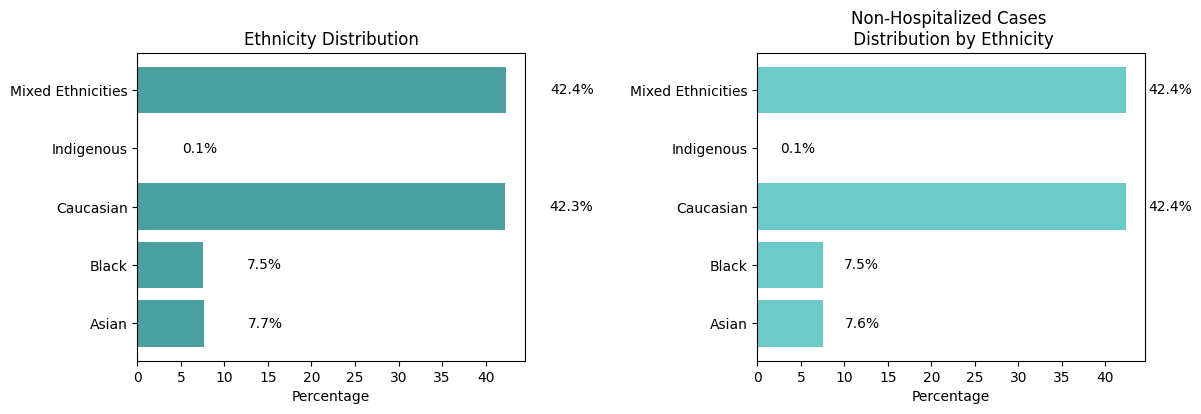

In [35]:
df_hosp = df_hosp.replace(['VPreta','Branca','Amarela','Indigena','Parda'],['Black','Caucasian','Asian','Indigenous','Mixed Ethnicities'])
df_non_hosp = df_non_hosp.replace(['Preta','Branca','Amarela','Indigena','Parda'],['Black','Caucasian','Asian','Indigenous','Mixed Ethnicities'])
df = df.replace(['Preta','Branca','Amarela','Indigena','Parda'],['Black','Caucasian','Asian','Indigenous','Mixed Ethnicities'])

def plot_side_by_side_bars(df1, df2, column):
    # Get the unique values and their counts from column1
    values1 = df1[column].value_counts().sort_index()
    total1 = values1.sum()
    percentages1 = (values1 / total1) * 100
    print("HOSP:",percentages1)

    # Get the unique values and their counts from column2
    values2 = df2[column].value_counts().sort_index()
    total2 = values2.sum()
    percentages2 = (values2 / total2) * 100
    print("NON-HOSP:",percentages2)

    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

    # Plot the first horizontal bar plot
    ax1.barh(values1.index, percentages1, color='#49A09E')
    ax1.set_xlabel('Percentage')
    ax1.set_title('Ethnicity Distribution')

    # Add percentages inside the bars in white
    for i, (value, percentage) in enumerate(zip(values1, percentages1)):
        ax1.text(percentage + 5, i, f'{percentage:.1f}%', va='center', color='black')

    # Plot the second horizontal bar plot
    ax2.barh(values2.index, percentages2, color='#6CCAC8')
    ax2.set_xlabel('Percentage')
    ax2.set_title('Non-Hospitalized Cases \n Distribution by Ethnicity')

    # Add percentages inside the bars in white
    for i, (value, percentage) in enumerate(zip(values2, percentages2)):
        ax2.text(percentage + 2.5, i, f'{percentage:.1f}%', va='center', color='black')

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.6)

    # Show the plot
    plt.show()

# Example usage
# Assuming 'df' is your DataFrame and 'column1' and 'column2' are the column names
plot_side_by_side_bars(df,df_non_hosp,'RacaCor')

#df_com_outliers = df_com_outliers.replace(['Black','Caucasion','Asian','Indigenous','Mixed Ethnicities'],['Preta','Branca','Amarela','Indigena','Parda'])
df = df.replace(['Black','Caucasion','Asian','Indigenous','Mixed Ethnicities'],['Preta','Branca','Amarela','Indigena','Parda'])

In [ ]:
df = df.drop(['RacaCor'], axis=1)

### Profisional de Saúde

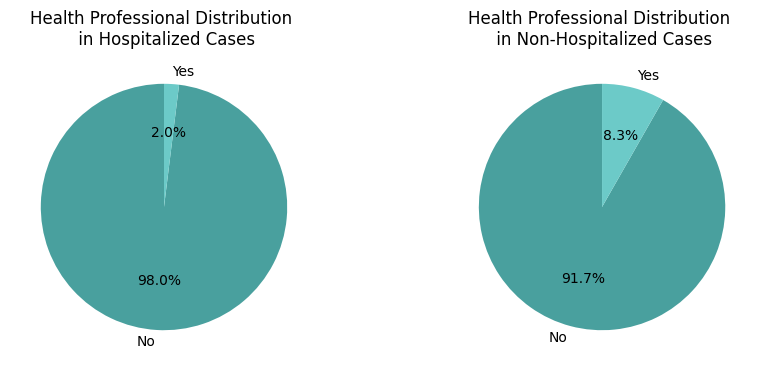

In [ ]:
df_hosp = df_hosp.replace(['Sim','Não'],['Yes','No'])
df_non_hosp = df_non_hosp.replace(['Sim','Não'],['Yes','No'])
df = df.replace(['Sim','Não'],['Yes','No'])

def plot_side_by_side_pie_charts(df1, df2, column):
    # Count the occurrences of each class in column1
    class_counts1 = df1[column].value_counts()
    labels1 = class_counts1.index.tolist()
    counts1 = class_counts1.tolist()

    # Count the occurrences of each class in column2
    class_counts2 = df2[column].value_counts()
    labels2 = class_counts2.index.tolist()
    counts2 = class_counts2.tolist()

    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # Plot the first pie chart
    ax1.pie(counts1, labels=labels1, autopct='%1.1f%%', startangle=90, colors=['#49A09E','#6CCAC8','#9DF0EE','#D3F9F8'])
    ax1.set_aspect('equal')  # Equal aspect ratio ensures a circular pie chart
    ax1.set_title('Health Professional Distribution \n in Hospitalized Cases')

    # Plot the second pie chart
    ax2.pie(counts2, labels=labels2, autopct='%1.1f%%', startangle=90, colors=['#49A09E','#6CCAC8','#9DF0EE','#D3F9F8'])
    ax2.set_aspect('equal')  # Equal aspect ratio ensures a circular pie chart
    ax2.set_title('Health Professional Distribution \n in Non-Hospitalized Cases')

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.3)

    # Show the plot
    plt.show()

# Example usage
# Assuming 'df' is your DataFrame and 'column1' and 'column2' are the column names
plot_side_by_side_pie_charts(df_hosp,df_non_hosp, 'ProfissionalSaude')



### Gravidez

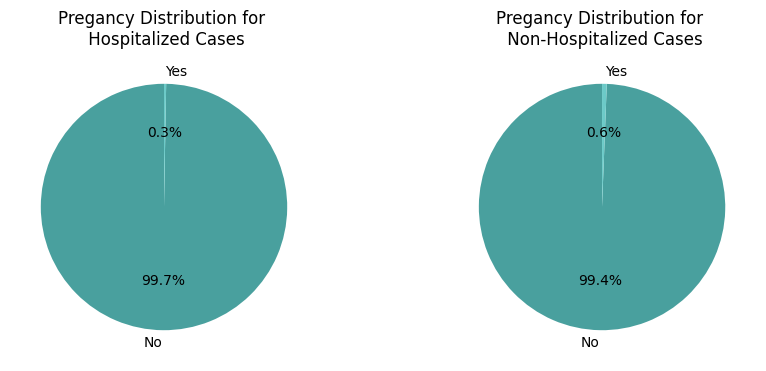

In [ ]:
df_hosp = df_hosp.replace([1.0,0.0],['Yes','No'])
df_non_hosp = df_non_hosp.replace([1.0,0.0],['Yes','No'])

def plot_side_by_side_pie_charts(df1, df2, column):
    # Count the occurrences of each class in column1
    class_counts1 = df1[column].value_counts()
    labels1 = class_counts1.index.tolist()
    counts1 = class_counts1.tolist()

    # Count the occurrences of each class in column2
    class_counts2 = df2[column].value_counts()
    labels2 = class_counts2.index.tolist()
    counts2 = class_counts2.tolist()

    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # Plot the first pie chart
    ax1.pie(counts1, labels=labels1, autopct='%1.1f%%', startangle=90, colors=['#49A09E','#6CCAC8','#9DF0EE','#D3F9F8'])
    ax1.set_aspect('equal')  # Equal aspect ratio ensures a circular pie chart
    ax1.set_title('Pregancy Distribution for \n Hospitalized Cases')

    # Plot the second pie chart
    ax2.pie(counts2, labels=labels2, autopct='%1.1f%%', startangle=90, colors=['#49A09E','#6CCAC8','#9DF0EE','#D3F9F8'])
    ax2.set_aspect('equal')  # Equal aspect ratio ensures a circular pie chart
    ax2.set_title('Pregancy Distribution for \n Non-Hospitalized Cases')

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.3)

    # Show the plot
    plt.show()

# Example usage
# Assuming 'df' is your DataFrame and 'column1' and 'column2' are the column names
plot_side_by_side_pie_charts(df_hosp,df_non_hosp, 'Gestante')


Dada a sua representatividade, tanto a coluna ```Gestante``` será removida bem como todas as linhas cuja classe é 1 (sim).

In [ ]:
df = df.drop(['Gestante'], axis=1)

### Deficiência

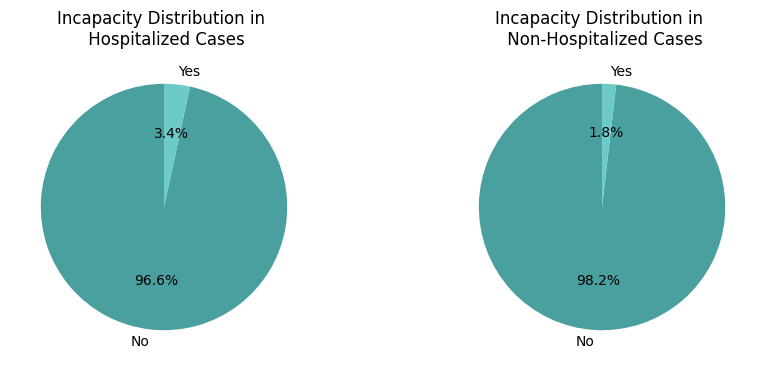

In [ ]:
def plot_side_by_side_pie_charts(df1, df2, column):
    # Count the occurrences of each class in column1
    class_counts1 = df1[column].value_counts()
    labels1 = class_counts1.index.tolist()
    counts1 = class_counts1.tolist()

    # Count the occurrences of each class in column2
    class_counts2 = df2[column].value_counts()
    labels2 = class_counts2.index.tolist()
    counts2 = class_counts2.tolist()

    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # Plot the first pie chart
    ax1.pie(counts1, labels=labels1, autopct='%1.1f%%', startangle=90, colors=['#49A09E','#6CCAC8','#9DF0EE','#D3F9F8'])
    ax1.set_aspect('equal')  # Equal aspect ratio ensures a circular pie chart
    ax1.set_title('Incapacity Distribution in \n Hospitalized Cases')

    # Plot the second pie chart
    ax2.pie(counts2, labels=labels2, autopct='%1.1f%%', startangle=90, colors=['#49A09E','#6CCAC8','#9DF0EE','#D3F9F8'])
    ax2.set_aspect('equal')  # Equal aspect ratio ensures a circular pie chart
    ax2.set_title('Incapacity Distribution in \n Non-Hospitalized Cases')

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.3)

    # Show the plot
    plt.show()

# Example usage
# Assuming 'df' is your DataFrame and 'column1' and 'column2' are the column names
plot_side_by_side_pie_charts(df_hosp,df_non_hosp, 'PossuiDeficiencia')

#df_com_outliers = df_com_outliers.replace(['Yes','No'],['Sim','Não'])

Semelhante ao caso anterior, a percentagem é tão pequena (>2%) que será desconsiderada tanto a coluna ```PossuiDeficiencia``` bem como as entradas com *sim*.

Outra razão a favor desta decisão é o facto do MVP da nossa solução estar a ser desenhada, **para já**, apenas para casos de pessoas sem deficiência.

In [ ]:
df.to_csv("df_classification.csv", encoding='utf-8')

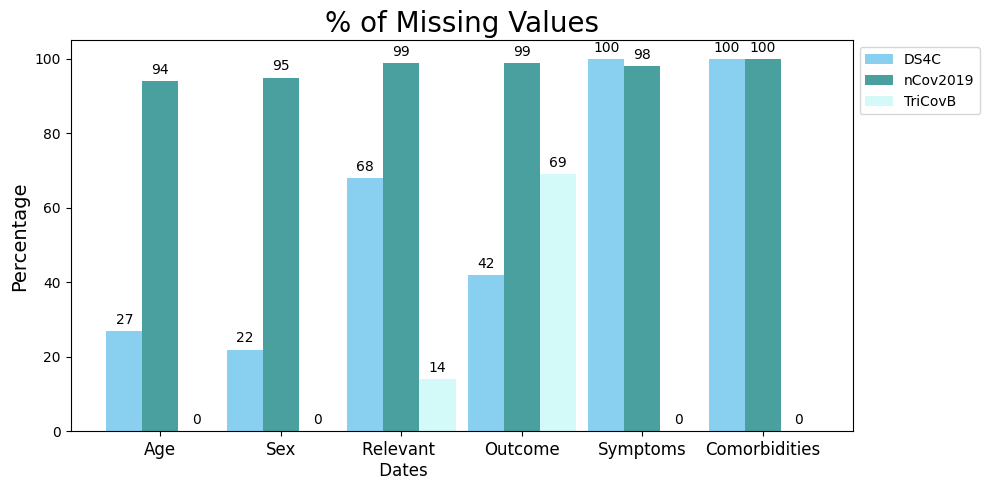

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = ['Age', 'Sex', 'Relevant \n Dates', 'Outcome', 'Symptoms', 'Comorbidities']
DS4C = [27, 22, 68, 42, 100, 100]
nCov2019 = [94, 95, 99, 99, 98, 100]
TriCovB = [0, 0, 14, 69, 0, 0]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width, DS4C, width, label='DS4C', color='#89CFF0')
rects2 = ax.bar(x, nCov2019, width, label='nCov2019', color='#49A09E')
rects3 = ax.bar(x + width, TriCovB, width, label='TriCovB', color='#D3F9F8')

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Percentage')
ax.set_title('% of Missing Values', fontsize=20)
ax.set_ylabel('Percentage', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend(loc='upper left', bbox_to_anchor=(1,1))


# Add values on top of each bar
for rects in [rects1, rects2, rects3]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

fig.tight_layout()

plt.show()


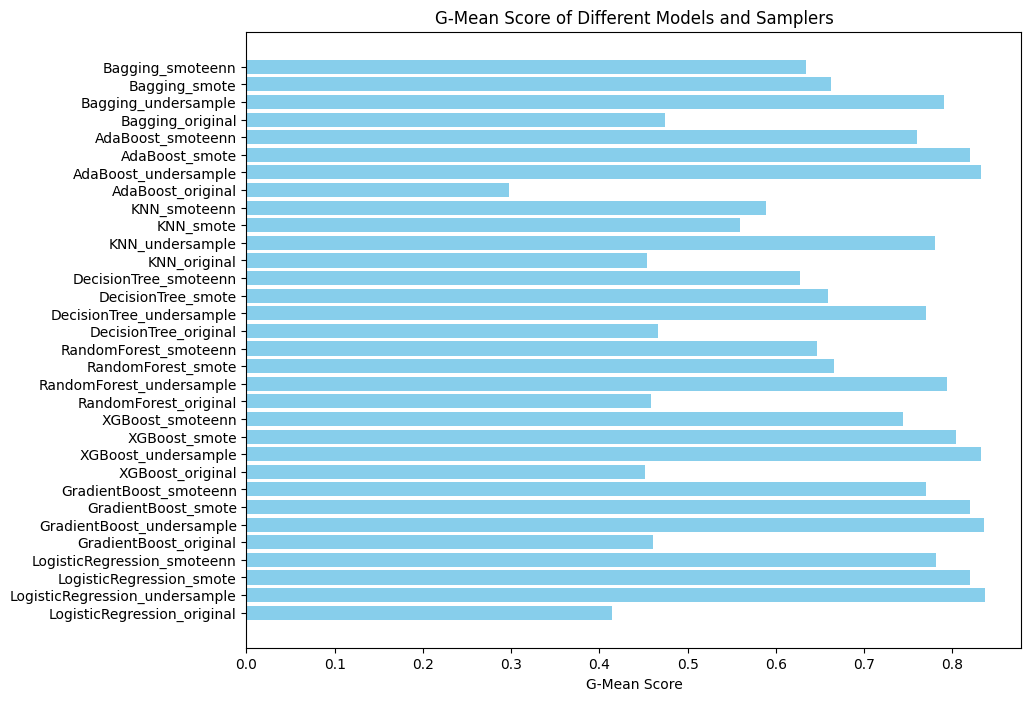

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their G-Mean Scores
models = ['LogisticRegression_original', 'LogisticRegression_undersample', 'LogisticRegression_smote', 'LogisticRegression_smoteenn',
          'GradientBoost_original', 'GradientBoost_undersample', 'GradientBoost_smote', 'GradientBoost_smoteenn',
          'XGBoost_original', 'XGBoost_undersample', 'XGBoost_smote', 'XGBoost_smoteenn',
          'RandomForest_original', 'RandomForest_undersample', 'RandomForest_smote', 'RandomForest_smoteenn',
          'DecisionTree_original', 'DecisionTree_undersample', 'DecisionTree_smote', 'DecisionTree_smoteenn',
          'KNN_original', 'KNN_undersample', 'KNN_smote', 'KNN_smoteenn',
          'AdaBoost_original', 'AdaBoost_undersample', 'AdaBoost_smote', 'AdaBoost_smoteenn',
          'Bagging_original', 'Bagging_undersample', 'Bagging_smote', 'Bagging_smoteenn']

g_mean_scores = [0.4146196669538266, 0.8365937595632096, 0.820085621096876, 0.7820889658523014,
                 0.4610005703093906, 0.8363918361931671, 0.8196578102663707, 0.7701390341941116,
                 0.45195627281045436, 0.8323592485604814, 0.8042829546203558, 0.7443787948375639,
                 0.45896765335290707, 0.7939300517914123, 0.6661511834816831, 0.6466751783590359,
                 0.4662704144597361, 0.7706563985678941, 0.6585726890413812, 0.627885111109436,
                 0.4540401228229499, 0.7800404180272495, 0.5590892794082793, 0.5884562966272269,
                 0.29747097662942007, 0.8322562240261714, 0.820042147566969, 0.7604398235796831,
                 0.47487015213016204, 0.7903315469377546, 0.6624468295077511, 0.6336999141758248]

# Create a bar plot
plt.figure(figsize=(10, 8))
plt.barh(models, g_mean_scores, color='skyblue')
plt.xlabel('G-Mean Score')
plt.title('G-Mean Score of Different Models and Samplers')
plt.show()


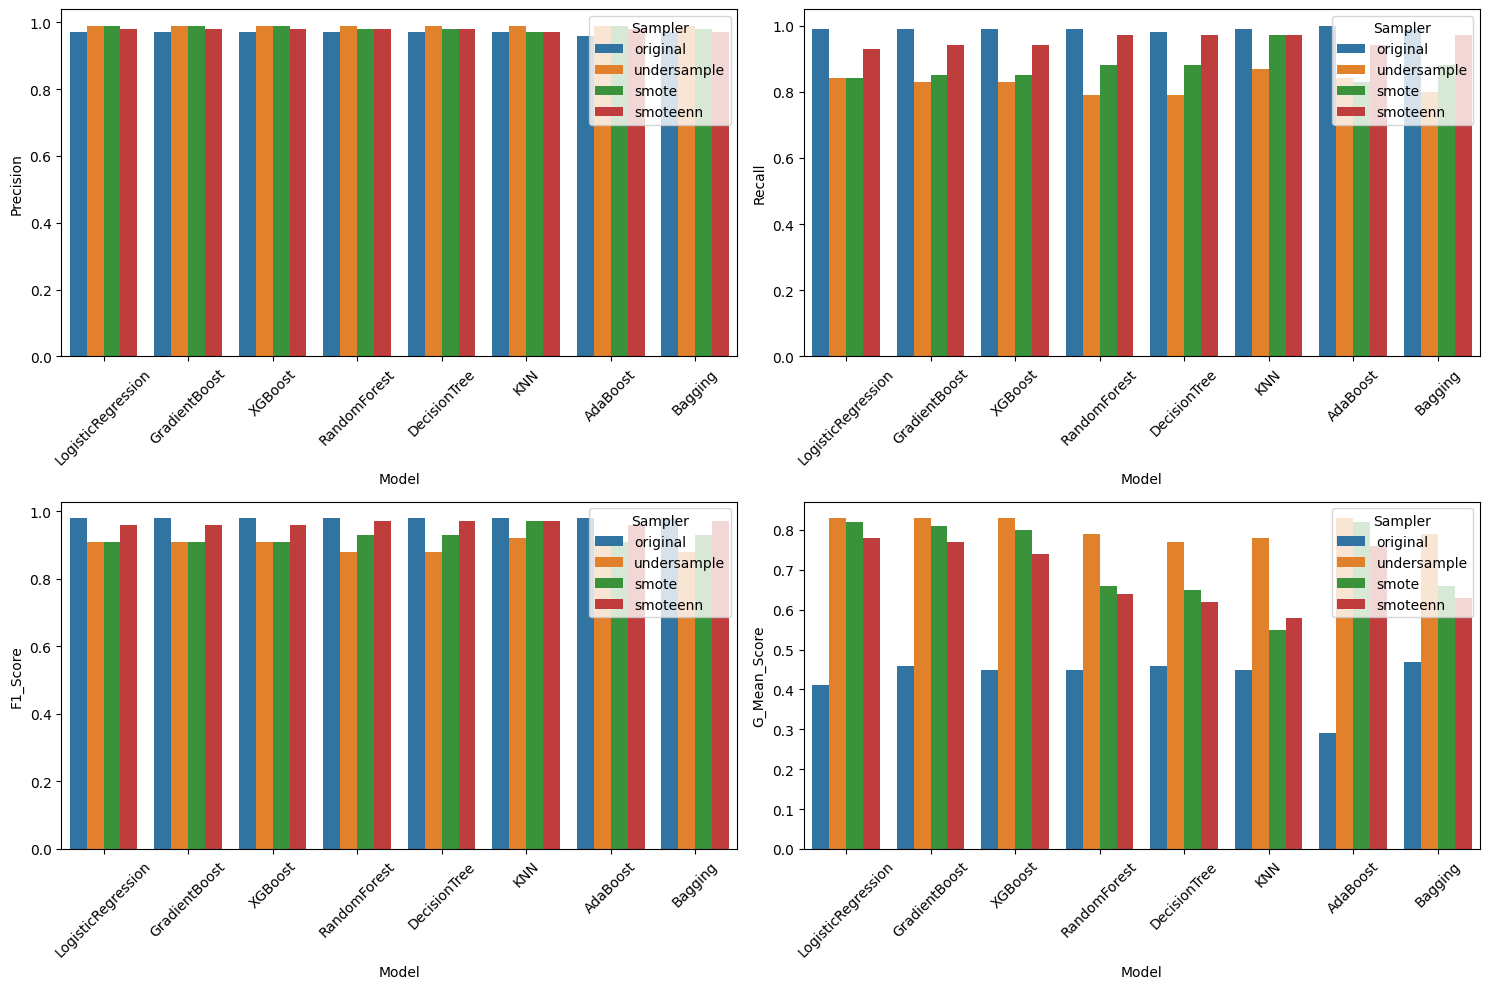

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame from your results
data = {
    'Model': ['LogisticRegression', 'LogisticRegression', 'LogisticRegression', 'LogisticRegression', 'GradientBoost', 'GradientBoost', 'GradientBoost', 'GradientBoost', 'XGBoost', 'XGBoost', 'XGBoost', 'XGBoost', 'RandomForest', 'RandomForest', 'RandomForest', 'RandomForest', 'DecisionTree', 'DecisionTree', 'DecisionTree', 'DecisionTree', 'KNN', 'KNN', 'KNN', 'KNN', 'AdaBoost', 'AdaBoost', 'AdaBoost', 'AdaBoost', 'Bagging', 'Bagging', 'Bagging', 'Bagging'],
    'Sampler': ['original', 'undersample', 'smote', 'smoteenn', 'original', 'undersample', 'smote', 'smoteenn', 'original', 'undersample', 'smote', 'smoteenn', 'original', 'undersample', 'smote', 'smoteenn', 'original', 'undersample', 'smote', 'smoteenn', 'original', 'undersample', 'smote', 'smoteenn', 'original', 'undersample', 'smote', 'smoteenn', 'original', 'undersample', 'smote', 'smoteenn'],
    'Precision': [0.97, 0.99, 0.99, 0.98, 0.97, 0.99, 0.99, 0.98, 0.97, 0.99, 0.99, 0.98, 0.97, 0.99, 0.98, 0.98, 0.97, 0.99, 0.98, 0.98, 0.97, 0.99, 0.97, 0.97, 0.96, 0.99, 0.99, 0.98, 0.97, 0.99, 0.98, 0.97],
    'Recall': [0.99, 0.84, 0.84, 0.93, 0.99, 0.83, 0.85, 0.94, 0.99, 0.83, 0.85, 0.94, 0.99, 0.79, 0.88, 0.97, 0.98, 0.79, 0.88, 0.97, 0.99, 0.87, 0.97, 0.97, 1.00, 0.84, 0.83, 0.94, 0.99, 0.80, 0.88, 0.97],
    'F1_Score': [0.98, 0.91, 0.91, 0.96, 0.98, 0.91, 0.91, 0.96, 0.98, 0.91, 0.91, 0.96, 0.98, 0.88, 0.93, 0.97, 0.98, 0.88, 0.93, 0.97, 0.98, 0.92, 0.97, 0.97, 0.98, 0.91, 0.91, 0.96, 0.98, 0.88, 0.93, 0.97],
    'G_Mean_Score': [0.41, 0.83, 0.82, 0.78, 0.46, 0.83, 0.81, 0.77, 0.45, 0.83, 0.80, 0.74, 0.45, 0.79, 0.66, 0.64, 0.46, 0.77, 0.65, 0.62, 0.45, 0.78, 0.55, 0.58, 0.29, 0.83, 0.82, 0.76, 0.47, 0.79, 0.66, 0.63]
}

df = pd.DataFrame(data)

# Create a figure and axis
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Create bar plots
sns.barplot(x='Model', y='Precision', hue='Sampler', data=df, ax=ax[0, 0])
sns.barplot(x='Model', y='Recall', hue='Sampler', data=df, ax=ax[0, 1])
sns.barplot(x='Model', y='F1_Score', hue='Sampler', data=df, ax=ax[1, 0])
sns.barplot(x='Model', y='G_Mean_Score', hue='Sampler', data=df, ax=ax[1, 1])

# Rotate x-axis labels for readability
for axis in ax.flat:
    plt.setp(axis.get_xticklabels(), rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
